# Optimization

## Subproject 1: Code an optimizer to solve the Eggholder and Levi13 functions

* The goal of this project is to optmize the Eggholder and Levi13 functions.
* Feel free to implement any of the algorithms we mentioned in the class
* Ideally, implement two of them and compare the results
* If two algorithms found the best solution, the better one is the one with fewer calls to the objective function

Imports

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from numpy import asarray
from numpy import arange
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
from numpy import meshgrid

from scipy.optimize import dual_annealing
from numpy.random import rand
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi


**Let's define our objective functions**

In [19]:
def objective_eggholder(x1, x2):
  ## Find the global minimum [f(512, 404.2319) = -959.6407]
  a=np.sqrt(np.fabs(x2+x1/2+47))
  b=np.sqrt(np.fabs(x1-(x2+47)))
  return -(x2+47)*np.sin(a)-x1*np.sin(b)

def objective_levi_n13(x1, x2):
  return ((np.sin(3 * np.pi * x1)**2) + (
      (x1 - 1)**2) * (1 + np.sin(3 * np.pi * x2)**2) + (
          (x2 - 1)**2) * (1 + np.sin(2 * np.pi * x2)**2))

def objective_wrapper(solution):
  return objective_levi_n13(solution[0], solution[1])

print(objective_wrapper(np.array([105.5, 0.4])))
print(np.exp(-1.41))

14694.587960529503
0.2441432831534371


Plotting the objective function

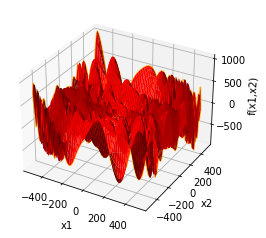

In [20]:
def plot_objective(f):
  fig=plt.figure()
  ax=plt.axes(projection='3d')
  x1=np.linspace(-512,512,100)
  x2=np.linspace(-512,512,100)
  X1,X2=np.meshgrid(x1,x2)
  ax.plot_surface(X1,X2,f(X1,X2),color='red')
  ax.plot_wireframe(X1,X2,f(X1,X2),ccount=15,rcount=15,color='orange',alpha=0.8)
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('f(x1,x2)')

plot_objective(objective_eggholder)

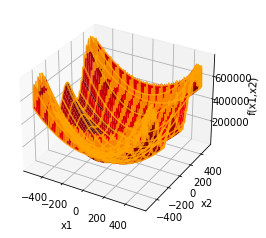

In [21]:
plot_objective(objective_levi_n13)

## Algorithms pasted from slides 
some other notes about this https://machinelearningmastery.com/hill-climb-the-test-set-for-machine-learning/

https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/

## Hillclimbing algorithm

In [22]:
#Using this function to clip the bounds, so it will not go over the boundary
def check_bounds(point, bounds):
    return [
        np.clip(point[i], bounds[i, 0], bounds[i, 1])
        for i in range(len(bounds))
    ]

def hillclimbing(objective, bounds, n_iterations, step_size):
  solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  solution_eval = objective(solution[0], solution[1])
  for i in range(n_iterations):
    #implementing the check_bounds function on every step
    candidate = check_bounds((solution + np.random.randn(len(bounds)) * step_size), bounds) 
    candidate_eval = objective(candidate[0], candidate[1])
    if candidate_eval <= solution_eval:
      solution, solution_eval = candidate, candidate_eval
      print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
  return [solution, solution_eval]

## Simulated annealing

In [29]:
#Using this function to clip the bounds, so it will not go over the boundary
def check_bounds(point, bounds):
    return [
        np.clip(point[i], bounds[i, 0], bounds[i, 1])
        for i in range(len(bounds))
    ]

def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
  best = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  best_eval = objective(best[0], best[1])
  curr, curr_eval = best, best_eval
  for i in range(n_iterations):
    #implementing the check_bounds function on every step
    candidate = check_bounds((curr + np.random.randn(len(bounds)) * step_size), bounds) 
    candidate_eval = objective(candidate[0], candidate[1])
    if candidate_eval < best_eval:
      best, best_eval = candidate, candidate_eval
      print('>%d f(%s) = %.5f' % (i, best, best_eval))
    diff = candidate_eval - curr_eval
    t = temp / float(i + 1)
    metropolis = np.exp(-diff / t)
    if diff < 0 or np.random.rand() < metropolis:
      curr, curr_eval = candidate, candidate_eval
  return [best, best_eval]

## Objective Levi_n13

In [23]:
bounds = np.array([[-10, 10],[-10, 10]])

n_iterations = 100000
step_size = 20

In [24]:
n_iterations = 1000000
step_size = 0.7

In [25]:
bounds = np.array([[-512, 512],[-512, 512]])

n_iterations = 500000
step_size = 500

In [26]:
hill_eggholder, hill_eggholder_eval = hillclimbing(objective_eggholder, bounds, n_iterations, step_size)
print(hill_eggholder, hill_eggholder_eval)

>0 f([151.08749914362204, -411.83091438017993]) = -251.65283
>8 f([490.676060714963, -313.3543955721305]) = -602.26414
>39 f([370.04136167283076, 508.82383457801114]) = -807.24970
>80 f([464.66966466884935, 479.7799561351223]) = -812.75900
>207 f([512.0, 407.6923061794803]) = -945.75719
>372 f([512.0, 403.4358597029977]) = -958.92438
>445 f([512.0, 404.1319910544419]) = -959.62934
>20129 f([512.0, 404.27153134186244]) = -959.63887
>55303 f([512.0, 404.2411687827724]) = -959.64056
>118539 f([512.0, 404.23905706287036]) = -959.64060
>345318 f([512.0, 404.2280236094593]) = -959.64065
[512.0, 404.2280236094593] -959.640646464851


## Objective eggholder

In [30]:
bounds = np.array([[-512, 512],[-512, 512]])
n_iterations = 300000
step_size = 1000
temp = 10

In [31]:
solution_egg_sim, solution_eval_egg_sim = simulated_annealing(objective_eggholder, bounds, n_iterations, step_size, temp)
print(solution_egg_sim, solution_eval_egg_sim)

>0 f([512.0, 512.0]) = -126.16794
>1 f([207.0544234039338, 512.0]) = -300.31956
>4 f([-512.0, -3.4946115241031066]) = -551.34772
>7 f([-512.0, 273.8696875848292]) = -597.25072
>49 f([-329.41796754986024, 512.0]) = -801.71681
>61 f([364.13272347344343, 512.0]) = -843.78936
>503 f([512.0, 402.6920085308631]) = -956.97450
>1332 f([512.0, 404.0877857699549]) = -959.61711


<ipython-input-29-50cf973651c4>:21: RuntimeWarning: overflow encountered in exp
  metropolis = np.exp(-diff / t)


>26518 f([512.0, 404.14780836026245]) = -959.63265
>42053 f([512.0, 404.28887237878064]) = -959.63696
>58037 f([512.0, 404.17873171783873]) = -959.63746
>92630 f([512.0, 404.28343038026406]) = -959.63763
>135788 f([512.0, 404.2595301741783]) = -959.63979
>175330 f([512.0, 404.2265310326901]) = -959.64063
[512.0, 404.2265310326901] -959.6406310999838


The main loop of the algorithm. Record the best solutions in each loop and print it out to see the progress

Show the solutions ploted on the function to check if the solution makes sense

Which algorithms is better? Write observations about algorithm performances, drawbacks, etc...

## Subproject 2: Code an algorithm that will improve the route between the cities

Traveling Salesman Problem is the most famous NP-hard benchmark problem. You get a list of cities that you need to visit and return to the start position. The better route is the one with the shortest cost.

Implement an algorithm that will improve the route on the list of given cities.

In [ ]:
# Libs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import random, operator, time, itertools, math
import numpy as np


Some helper functions

In [69]:
def distance(city1, city2): 
    # The Euclidean distance between two cities.
    # city1 and city2 are two dimensional vectors representing coordinates
    return np.linalg.norm(city1-city2)

def total_distance(city_list, tour):
    # The total distance between each pair of consecutive cities in the tour.
    # This is your objective function
    return sum(distance(city_list[tour[i]], city_list[tour[i-1]]) 
               for i in range(len(city_list)))

c1 = np.array([0.0, 300.0])
c2 = np.array([400.0, 0.0])
distance(c1, c2)

500.0

In [70]:
def generate_random_problem(num_cities=15):
  return [((np.random.rand(1,2) + 1) * 200) for _ in range(num_cities)]

def generate_predefined_problem():
  p = [np.array([[370, 260]]),
   np.array([[355, 378]]),
   np.array([[307, 369]]),
   np.array([[302, 399]]),
   np.array([[238, 265]]),
   np.array([[215, 333]]),
   np.array([[304, 282]]),
   np.array([[277, 207]]),
   np.array([[227, 323]]),
   np.array([[394, 314]]),
   np.array([[220, 226]]),
   np.array([[321, 333]]),
   np.array([[363, 252]]),
   np.array([[272, 257]]),
   np.array([[397, 341]])]
  return p

city_list = generate_predefined_problem()
print(f"city list {city_list}")

city list [array([[370, 260]]), array([[355, 378]]), array([[307, 369]]), array([[302, 399]]), array([[238, 265]]), array([[215, 333]]), array([[304, 282]]), array([[277, 207]]), array([[227, 323]]), array([[394, 314]]), array([[220, 226]]), array([[321, 333]]), array([[363, 252]]), array([[272, 257]]), array([[397, 341]])]


In [71]:
# An individual is a permutation of the indexes representing the cities in the
# `problem` list of cities

solution_1 = random.sample(list(range(len(city_list))), k=len(city_list))
print(solution_1)
total_distance(city_list, solution_1)

[8, 1, 0, 9, 13, 4, 14, 6, 7, 3, 12, 11, 10, 2, 5]


1725.9790518437449

In [72]:
solution_2 = random.sample(list(range(len(city_list))), k=len(city_list))
print(solution_2)
initial_distance =total_distance(city_list, solution_2)

[3, 13, 8, 14, 12, 2, 7, 6, 1, 5, 10, 11, 9, 4, 0]


In [73]:
bounds = solution_2
n_iterations = 1000000
step_size = 20


* Show if the solution improved over time
* Plot a radom solution and the optimized one. Is there any visible improvements over the random one? Do some transitions make more sense in the optimized solution?

In [74]:
def swap_random(seq, step_size):
  idx = range(len(seq))
  i1, i2 = random.sample(idx, 2)
  seq[i1], seq[i2] = seq[i2], seq[i1]
  return seq

In [75]:
def hillclimbing(objective, bounds, n_iterations, step_size):
  solution_2 = random.sample(list(range(len(city_list))) , k=len(city_list))
  solution_2_eval = total_distance(city_list, solution_2)

  for i in range(n_iterations):
    new_solution = swap_random(solution_2, step_size)
    new_solution_eval = total_distance(city_list, new_solution)
    if new_solution_eval <= solution_2_eval:
      solution_2, solution_2_eval =  new_solution, new_solution_eval
      print('>%d f(%s) = %.5f' % (i, solution, solution_2_eval))
  return [solution_2, solution_2_eval]

In [76]:
travel_solution, travel_distance = hillclimbing(initial_distance, solution_2, n_iterations, step_size)
print(travel_solution, travel_distance)

>0 f([482.35329151 432.87897751]) = 1323.54922
>77 f([482.35329151 432.87897751]) = 1317.75584
>375 f([482.35329151 432.87897751]) = 1258.15546
>540 f([482.35329151 432.87897751]) = 1118.62657
>7146 f([482.35329151 432.87897751]) = 1104.25020
>7148 f([482.35329151 432.87897751]) = 1042.15398
>15847 f([482.35329151 432.87897751]) = 995.74197
>94073 f([482.35329151 432.87897751]) = 980.17777
>138994 f([482.35329151 432.87897751]) = 974.42185
>272054 f([482.35329151 432.87897751]) = 892.95764
[8, 7, 1, 14, 0, 4, 12, 11, 5, 2, 6, 13, 9, 3, 10] 892.9576406956617


[array([[227, 323]]), array([[355, 378]]), array([[370, 260]]), array([[394, 314]]), array([[272, 257]]), array([[238, 265]]), array([[397, 341]]), array([[304, 282]]), array([[277, 207]]), array([[302, 399]]), array([[363, 252]]), array([[321, 333]]), array([[220, 226]]), array([[307, 369]]), array([[215, 333]]), array([[227, 323]])]
[array([[227, 323]])]


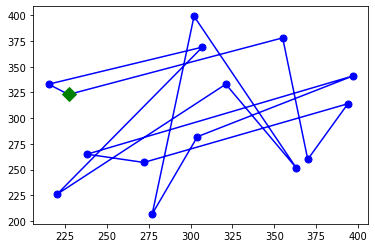

In [77]:
# Code for plotting
def plot_tour(city_list, solution, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    tour = [city_list[idx] for idx in solution]
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)
    # plt.show()
    
def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = xy_separate(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)
    
def xy_separate(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    print(points)
    return [p[0][0] for p in points], [p[0][1] for p in points]

plot_tour(city_list, solution_1)

[array([[302, 399]]), array([[272, 257]]), array([[227, 323]]), array([[397, 341]]), array([[363, 252]]), array([[307, 369]]), array([[277, 207]]), array([[304, 282]]), array([[355, 378]]), array([[215, 333]]), array([[220, 226]]), array([[321, 333]]), array([[394, 314]]), array([[238, 265]]), array([[370, 260]]), array([[302, 399]])]
[array([[302, 399]])]


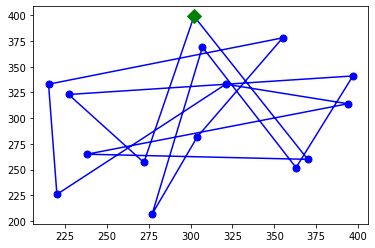

In [78]:
# Code for plotting
def plot_tour(city_list, solution, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    tour = [city_list[idx] for idx in solution]
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)
    # plt.show()
    
def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = xy_separate(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)
    
def xy_separate(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    print(points)
    return [p[0][0] for p in points], [p[0][1] for p in points]

plot_tour(city_list, solution_2)